In [1]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
%matplotlib inline
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2

# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean*2      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'text.fontsize': 14,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)

# --------------- Latex Plot Beautification --------------------------

/shared/users/asousa/software/python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


loading  /shared/users/asousa/WIPP/WIPPv4/rays/33f_kp4/newray230.dat
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.
  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.
  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.
  55.  56.  57.  58.  59.]


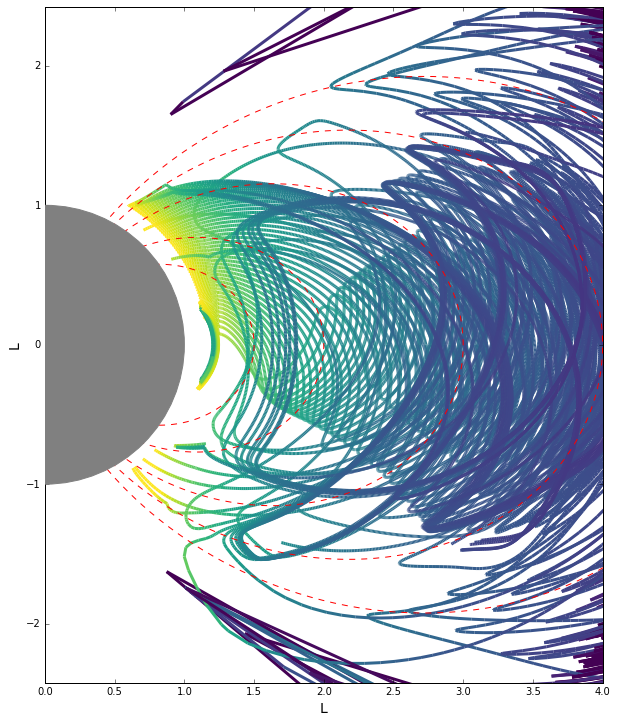

In [101]:
from matplotlib import collections  as mc
from load_rayfile import load_rayfile
directory = '/shared/users/asousa/WIPP/WIPPv4/rays/33f_kp4/'
frequency = 230

D2R = np.pi/180.
L_shells = [1.5, 2, 3, 4, 5]

l_min = 1
l_max = 60

psize = 4.0


RF = load_rayfile(directory, frequency)
all_lats = np.array(sorted(RF.keys()))
lats = all_lats[(all_lats >= l_min) & (all_lats <= l_max)]
print all_lats

# Initialize plot
fig, ax = plt.subplots()

# Plot the earth
earth = plt.Circle((0,0),1,color='0.5',alpha=1, zorder=100)

ax.add_patch(earth)                    # The earth (round)


# Plot the fieldlines
for L in L_shells:
    lam = np.linspace(-80,80,181)
    L_r = L*pow(np.cos(lam*D2R),2)
    Lx  = L_r*np.cos(lam*D2R)
    Ly  = L_r*np.sin(lam*D2R)
    ax.plot(Lx,Ly,color='r',linewidth=1,linestyle='dashed')  # Field line

# Plot the rays
for l in lats:    
    X = RF[l].distre*np.cos(RF[l].lat*np.pi/180.0)
    Y = RF[l].distre*np.sin(RF[l].lat*np.pi/180.0)
    # pick colormap here
    C = plt.cm.viridis(RF[l].power)
    points = np.array([X, Y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = mc.LineCollection(segments, colors=C,alpha=1,linewidth=3)
#     lc.set_linewidth(10)

    ax.add_collection(lc)
    

    

# ax.autoscale()

ax.set_aspect('equal', 'datalim')

ax.set_xlim([0, psize])
ax.set_ylim([-psize/2.0, psize/2.0])
ax.set_xlabel('L')
ax.set_ylabel('L')



plt.show()




In [4]:
RF[40.0]

,tg,distre,lat,delta,tp,l_sh,psi,psiray,psires,mu,dens,anH,anHe,anO,fH,stixP,stixR,stixL,power
2,0.000000,1.156986,40.000000,0.000000,0.000000,1.971606,-30.789734,-14.351739,-90.000000,25.575539,6241.85210,499.34818,124.837040,5617.667000,850.308900,-503233.280,562.28009,-648.35022,1.000000
3,0.003504,1.169284,39.819252,0.638732,0.003336,1.982075,-30.312754,-14.162612,-90.000000,25.403429,5985.08940,517.87030,127.231410,5339.987800,822.045720,-482534.060,557.44250,-643.05573,0.986875
4,0.007009,1.181622,39.635792,1.273355,0.006671,1.992358,-29.843004,-13.974759,-90.000000,25.244305,5744.77200,536.53033,129.579060,5078.662600,794.875610,-463160.690,553.07526,-638.36780,0.973976
5,0.010516,1.193993,39.449703,1.903176,0.010007,2.002451,-29.381132,-13.788527,-90.000000,25.097935,5519.77640,555.29303,131.875340,4832.607900,768.760620,-445022.500,549.16705,-634.26196,0.961302
6,0.014024,1.206394,39.261086,2.527519,0.013343,2.012352,-28.927769,-13.604257,-90.000000,24.964090,5309.05620,574.12238,134.115840,4600.817900,743.663570,-428035.220,545.70709,-630.71509,0.948856
7,0.017534,1.218817,39.070030,3.145730,0.016678,2.022060,-28.483511,-13.422291,-90.000000,24.842535,5111.63960,592.98181,136.296360,4382.361300,719.547970,-412120.470,542.68500,-627.70538,0.936637
8,0.021045,1.231257,38.876644,3.757178,0.020014,2.031574,-28.048933,-13.242964,-90.000000,24.733027,4926.62110,611.83478,138.412950,4176.373500,696.378420,-397205.250,540.09070,-625.21222,0.924645
9,0.024559,1.243710,38.681034,4.361261,0.023349,2.040894,-27.624571,-13.066600,-90.000000,24.635317,4753.15970,630.64465,140.461940,3982.053200,674.120000,-383221.720,537.91431,-623.21594,0.912880
10,0.028074,1.256168,38.483315,4.957406,0.026685,2.050019,-27.210928,-12.893511,-90.000000,24.549156,4590.47120,649.37518,142.440030,3798.655800,652.738830,-370106.690,536.14636,-621.69781,0.901341
11,0.031592,1.268627,38.283600,5.545074,0.030021,2.058950,-26.808470,-12.723997,-90.000000,24.474285,4437.82570,667.99097,144.344190,3625.490500,632.201900,-357801.310,534.77747,-620.63977,0.890029


In [62]:
np.max(plt.cm.jet(RF[l].power))

1.0

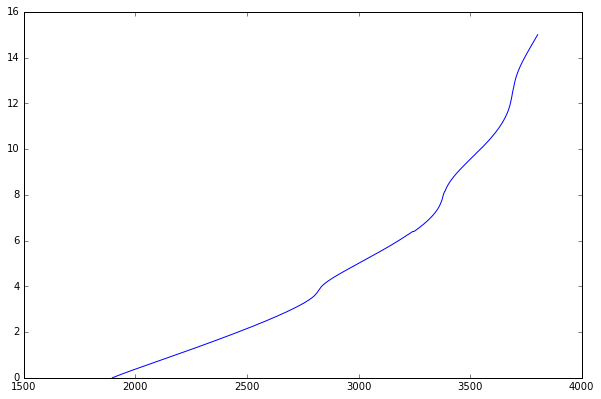

In [123]:
plt.plot((RF[43].tg))

In [125]:
EAa = gen_EA_array(3)
EAa


,lam,x1,x2,y1,y2,EAa,EAb,EAc,EA_length
0,0,2.900000,3.100000,0.000000,0.000000,0.000000,0.200000,0.000000,1275600.000000
1,5,2.871425,3.060340,0.234304,0.284658,-0.050355,0.188915,0.100326,1246965.098131
2,10,2.785672,2.945001,0.460301,0.550171,-0.089870,0.159329,0.177010,1166712.376475
3,15,2.643702,2.763624,0.668163,0.780726,-0.112562,0.119922,0.217454,1049013.871328
4,20,2.449441,2.529175,0.846812,0.965256,-0.118444,0.079734,0.222602,910657.357429
5,25,2.210807,2.255806,0.985711,1.097105,-0.111394,0.044999,0.201915,766252.113856
6,30,1.939278,1.957836,1.076786,1.173214,-0.096429,0.018558,0.167019,626307.166766
7,35,1.648617,1.649338,1.115634,1.193619,-0.077985,0.000721,0.127763,497407.623667
8,40,1.353408,1.343792,1.101958,1.161261,-0.059303,-0.009616,0.090858,383175.901420


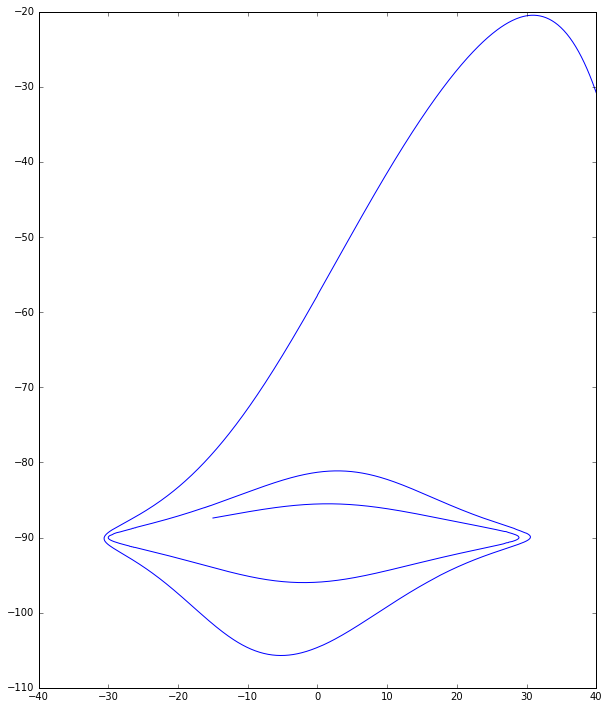

In [6]:
plt.figure()
plt.plot(RF[40.0].lat, RF[40.0].psi)

loading  /shared/users/asousa/WIPP/WIPPv4/rays/3dWIPP_comparison/newray240.dat


(0, 1)

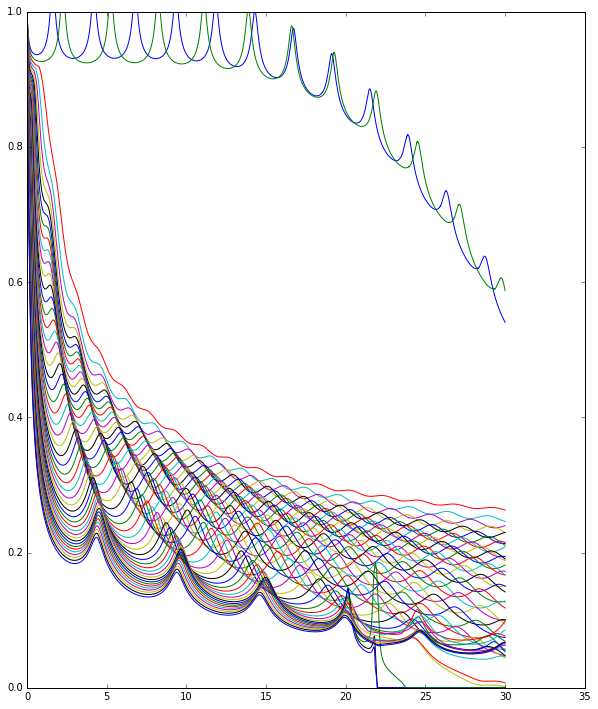

In [85]:
# Plot damping
from matplotlib import collections  as mc
from load_rayfile import load_rayfile
directory = '/shared/users/asousa/WIPP/WIPPv4/rays/3dWIPP_comparison/'
frequency = 240

D2R = np.pi/180.
L_shells = [1.5, 2, 3, 4, 5]

l_min = 1
l_max = 60


RF = load_rayfile(directory, frequency)
all_lats = np.array(sorted(RF.keys()))
lats = all_lats[(all_lats >= l_min) & (all_lats <= l_max)]

plt.figure()
for l in lats:
    plt.plot(RF[l].tg, RF[l].power)
plt.ylim([0,1])

In [23]:
RF = load_rayfile(directory, frequency)

loading  /shared/users/asousa/WIPP/WIPPv4/rays/3dWIPP_comparison/newray200.dat
                  0
0          1.000000
1          0.993291
2          0.986824
3          0.980601
4          0.974624
5          0.968898
6          0.963427
7          0.958216
8          0.953271
9          0.948601
10         0.944213
11         0.940116
12         0.936321
13         0.932838
14         0.929680
15         0.926858
16         0.924384
17         0.922271
18         0.920528
19         0.919166
20         0.918631
21         0.917859
22         0.917492
23         0.917540
24         0.918013
25         0.918925
26         0.920292
27         0.922135
28         0.924479
29         0.927356
...             ...
44319      0.132622
44320      0.132627
44321      0.132632
44322      0.132638
44323      0.132645
44324      0.132653
44325      0.132662
44326      0.132671
44327      0.132682
44328      0.132693
44329      0.132705
44330      0.132718
44331      0.132732
44332      0.132747
4